In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

from lusi.svm import SVMRandomInvariants, InvariantTypes
from lusi.invariants import *

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
diabetes_df = pd.read_csv('data/diabetes.csv')
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Get the data and split it in train and test
X, y = diabetes_df.drop('Outcome', axis=1).values, diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=47)

In [4]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants, invariant_type=InvariantTypes.HYPERPLANE)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)


Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.88it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:21<00:00, 12.31it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:26<00:00, 11.57it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.22it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:46<00:00,  9.42it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:53<00:00,  8.79it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:02<00:00,  8.15it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.61it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:21<00:00,  7.08it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:32<00:00,  6.55it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:39<00:00,  6.27it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:50<00:00,  5.86it/s]


[]

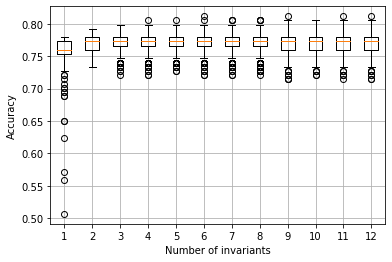

In [6]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

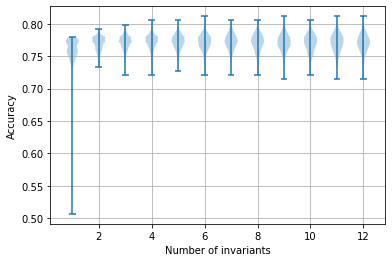

In [7]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

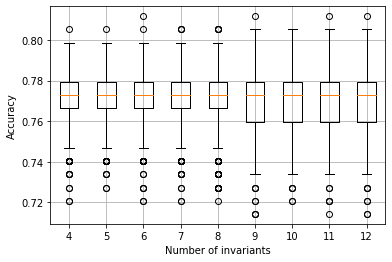

In [9]:
plt.boxplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

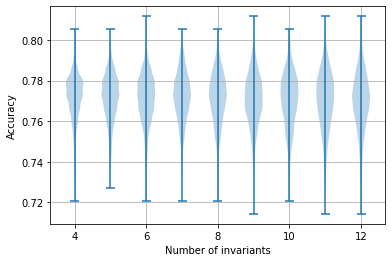

In [10]:
plt.violinplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [11]:
svm_baseline = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 103
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 309
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 42
Max. accuracy: 0.7922077922077922

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 329
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 89
Max. accuracy: 0.7987012987012987

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 396
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 118
Max. accuracy: 0.8051948051948052

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 381
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 160
Max. accuracy: 0.8051948051948052

Numbe

In [12]:
# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.3, num_invariants=num_invariants)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:17<00:00, 12.97it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:23<00:00, 11.96it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:35<00:00, 10.50it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:53<00:00,  8.83it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.52it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:46<00:00,  6.00it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:08<00:00,  5.30it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:38<00:00,  4.57it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:44<00:00,  1.55it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:48<00:00,  1.54it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:55<00:00,  1.53it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [10:45<00:00,  1.55it/s]


[]

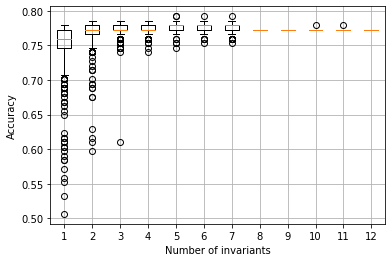

In [13]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

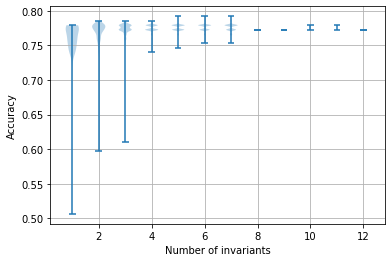

In [14]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

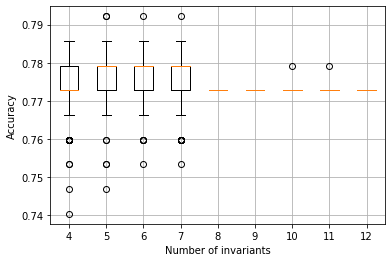

In [15]:
plt.boxplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

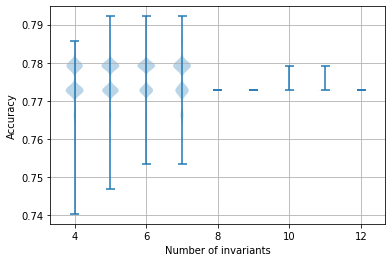

In [16]:
plt.violinplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [17]:
svm_baseline = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 1 invariants: 228
Number of elements with accuracy > 0.7792207792207793 using 1 invariants: 0
Max. accuracy: 0.7792207792207793

Number of elements with accuracy >= 0.7792207792207793 using 2 invariants: 411
Number of elements with accuracy > 0.7792207792207793 using 2 invariants: 8
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 3 invariants: 413
Number of elements with accuracy > 0.7792207792207793 using 3 invariants: 11
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 4 invariants: 452
Number of elements with accuracy > 0.7792207792207793 using 4 invariants: 15
Max. accuracy: 0.7857142857142857

Number of elements with accuracy >= 0.7792207792207793 using 5 invariants: 502
Number of elements with accuracy > 0.7792207792207793 using 5 invariants: 19
Max. accuracy: 0.7922077922077922

Number o

# Trying different train/test partitions

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants, invariant_type=InvariantTypes.HYPERPLANE)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.05it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.83it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.32it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 21.77it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 18.96it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:00<00:00, 16.67it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:06<00:00, 14.98it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:16<00:00, 13.03it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.12it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:30<00:00, 11.04it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:40<00:00,  9.98it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:50<00:00,  9.02it/s]


[]

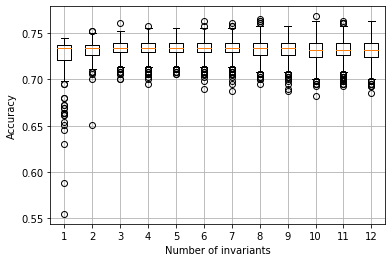

In [19]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

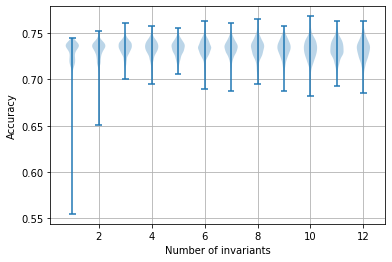

In [20]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

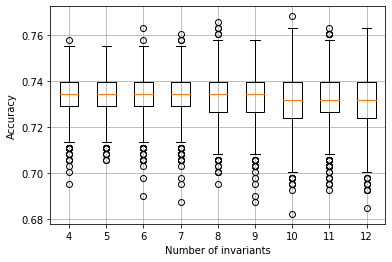

In [21]:
plt.boxplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

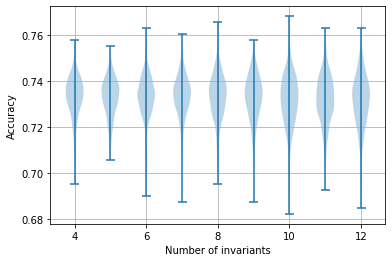

In [22]:
plt.violinplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [23]:
svm_baseline = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7421875

Number of elements with accuracy >= 0.7421875 using 1 invariants: 29
Number of elements with accuracy > 0.7421875 using 1 invariants: 3
Max. accuracy: 0.7447916666666666

Number of elements with accuracy >= 0.7421875 using 2 invariants: 107
Number of elements with accuracy > 0.7421875 using 2 invariants: 42
Max. accuracy: 0.7526041666666666

Number of elements with accuracy >= 0.7421875 using 3 invariants: 154
Number of elements with accuracy > 0.7421875 using 3 invariants: 70
Max. accuracy: 0.7604166666666666

Number of elements with accuracy >= 0.7421875 using 4 invariants: 186
Number of elements with accuracy > 0.7421875 using 4 invariants: 92
Max. accuracy: 0.7578125

Number of elements with accuracy >= 0.7421875 using 5 invariants: 168
Number of elements with accuracy > 0.7421875 using 5 invariants: 88
Max. accuracy: 0.7552083333333334

Number of elements with accuracy >= 0.7421875 using 6 invariants: 189
Number of elements with accuracy > 0.7421875 u

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants, invariant_type=InvariantTypes.HYPERPLANE)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.92it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 47.09it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:27<00:00, 36.59it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:33<00:00, 29.82it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.92it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:46<00:00, 21.29it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:54<00:00, 18.51it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:01<00:00, 16.33it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:07<00:00, 14.72it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:15<00:00, 13.24it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:24<00:00, 11.83it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:32<00:00, 10.86it/s]


[]

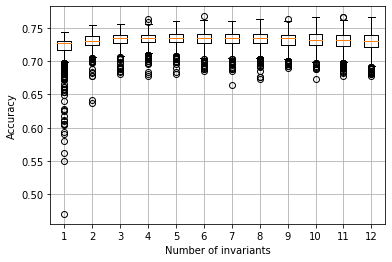

In [25]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

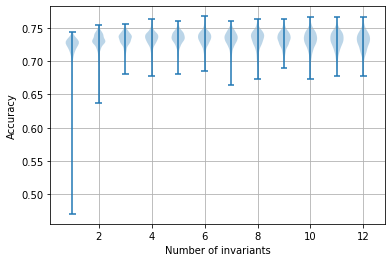

In [26]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

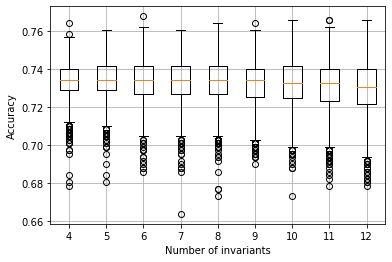

In [27]:
plt.boxplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

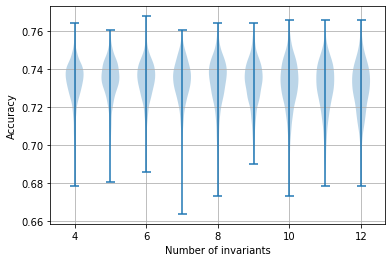

In [28]:
plt.violinplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [29]:
svm_baseline = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.741635687732342

Number of elements with accuracy >= 0.741635687732342 using 1 invariants: 13
Number of elements with accuracy > 0.741635687732342 using 1 invariants: 13
Max. accuracy: 0.7434944237918215

Number of elements with accuracy >= 0.741635687732342 using 2 invariants: 165
Number of elements with accuracy > 0.741635687732342 using 2 invariants: 110
Max. accuracy: 0.7546468401486989

Number of elements with accuracy >= 0.741635687732342 using 3 invariants: 214
Number of elements with accuracy > 0.741635687732342 using 3 invariants: 143
Max. accuracy: 0.7565055762081785

Number of elements with accuracy >= 0.741635687732342 using 4 invariants: 231
Number of elements with accuracy > 0.741635687732342 using 4 invariants: 145
Max. accuracy: 0.7639405204460966

Number of elements with accuracy >= 0.741635687732342 using 5 invariants: 276
Number of elements with accuracy > 0.741635687732342 using 5 invariants: 204
Max. accuracy: 0.7602230483271375

Number of elem

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.1, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants, invariant_type=InvariantTypes.HYPERPLANE)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 107.87it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.50it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 48.10it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 37.62it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:32<00:00, 30.85it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:38<00:00, 25.91it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:45<00:00, 21.74it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 19.04it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:58<00:00, 17.17it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.29it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:12<00:00, 13.73it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.44it/s]


[]

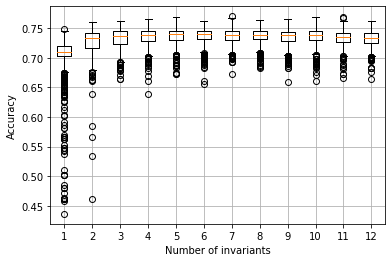

In [31]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

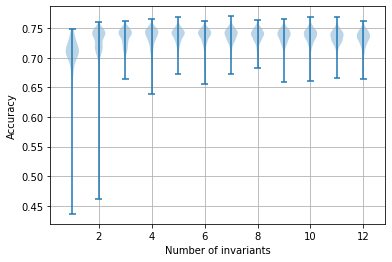

In [32]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

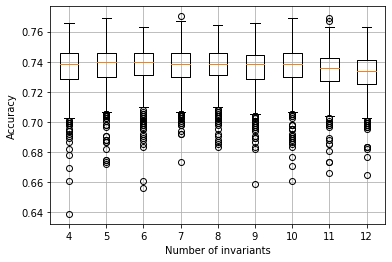

In [33]:
plt.boxplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

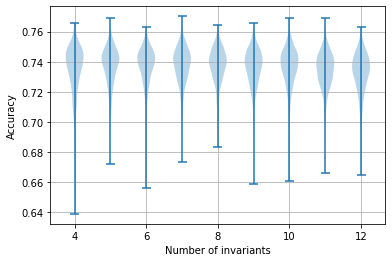

In [34]:
plt.violinplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [35]:
svm_baseline = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.7456647398843931

Number of elements with accuracy >= 0.7456647398843931 using 1 invariants: 5
Number of elements with accuracy > 0.7456647398843931 using 1 invariants: 1
Max. accuracy: 0.7485549132947977

Number of elements with accuracy >= 0.7456647398843931 using 2 invariants: 197
Number of elements with accuracy > 0.7456647398843931 using 2 invariants: 156
Max. accuracy: 0.7601156069364162

Number of elements with accuracy >= 0.7456647398843931 using 3 invariants: 250
Number of elements with accuracy > 0.7456647398843931 using 3 invariants: 203
Max. accuracy: 0.7615606936416185

Number of elements with accuracy >= 0.7456647398843931 using 4 invariants: 295
Number of elements with accuracy > 0.7456647398843931 using 4 invariants: 241
Max. accuracy: 0.7658959537572254

Number of elements with accuracy >= 0.7456647398843931 using 5 invariants: 267
Number of elements with accuracy > 0.7456647398843931 using 5 invariants: 227
Max. accuracy: 0.7687861271676301

Numbe

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, random_state=47)

# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Run experiments
accuracies = []

for num_invariants in range(1, 13):
    print(f'Running with {num_invariants} invariants...')
    invariant_accuracies = []

    for _ in tqdm(range(1000)):
        svm_rp = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=num_invariants, invariant_type=InvariantTypes.HYPERPLANE)
        svm_rp.fit(X_train_scaled, y_train)
        y_pred = svm_rp.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        invariant_accuracies.append(acc)
    
    accuracies.append(invariant_accuracies)

Running with 1 invariants...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:08<00:00, 120.69it/s]


Running with 2 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 71.45it/s]


Running with 3 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.53it/s]


Running with 4 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:25<00:00, 38.96it/s]


Running with 5 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:31<00:00, 31.58it/s]


Running with 6 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:37<00:00, 26.69it/s]


Running with 7 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:43<00:00, 22.89it/s]


Running with 8 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:50<00:00, 19.93it/s]


Running with 9 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:56<00:00, 17.65it/s]


Running with 10 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:02<00:00, 15.93it/s]


Running with 11 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:09<00:00, 14.40it/s]


Running with 12 invariants...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:16<00:00, 13.11it/s]


[]

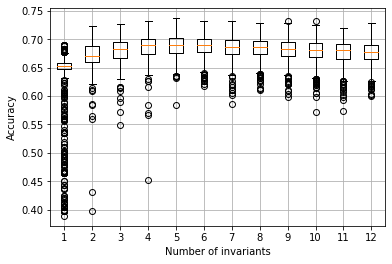

In [37]:
plt.boxplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

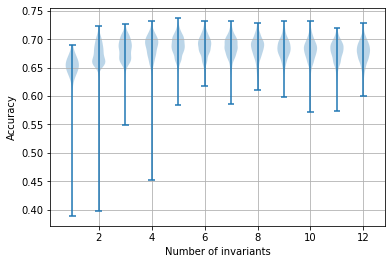

In [38]:
plt.violinplot(accuracies)
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

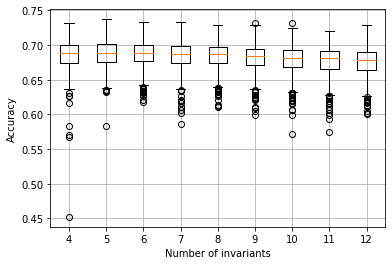

In [39]:
plt.boxplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

[]

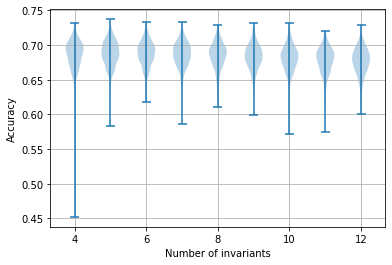

In [40]:
plt.violinplot(accuracies[3:], positions=range(4, 13))
plt.grid()
plt.xlabel('Number of invariants')
plt.ylabel('Accuracy')
plt.plot()

In [41]:
svm_baseline = SVMRandomInvariants(C=1, kernel='rbf', gamma='auto', delta=0.001, num_invariants=0)
svm_baseline.fit(X_train_scaled, y_train)
y_pred = svm_baseline.predict(X_test_scaled)
acc_baseline = accuracy_score(y_test, y_pred)

print(f'Baseline accuracy: {acc_baseline}')


for inv, acc in enumerate(accuracies):
    acc_arr = np.array(acc)
    n_high_acc_baseline = len(np.where(acc_arr >= acc_baseline)[0])
    n_high_acc = len(np.where(acc_arr > acc_baseline)[0])
    max_acc = np.max(acc_arr)
    print(f'\nNumber of elements with accuracy >= {acc_baseline} using {inv + 1} invariants: {n_high_acc_baseline}')
    print(f'Number of elements with accuracy > {acc_baseline} using {inv + 1} invariants: {n_high_acc}')
    print(f'Max. accuracy: {max_acc}')

Baseline accuracy: 0.684931506849315

Number of elements with accuracy >= 0.684931506849315 using 1 invariants: 6
Number of elements with accuracy > 0.684931506849315 using 1 invariants: 6
Max. accuracy: 0.6904109589041096

Number of elements with accuracy >= 0.684931506849315 using 2 invariants: 304
Number of elements with accuracy > 0.684931506849315 using 2 invariants: 277
Max. accuracy: 0.7232876712328767

Number of elements with accuracy >= 0.684931506849315 using 3 invariants: 476
Number of elements with accuracy > 0.684931506849315 using 3 invariants: 454
Max. accuracy: 0.726027397260274

Number of elements with accuracy >= 0.684931506849315 using 4 invariants: 591
Number of elements with accuracy > 0.684931506849315 using 4 invariants: 568
Max. accuracy: 0.7315068493150685

Number of elements with accuracy >= 0.684931506849315 using 5 invariants: 599
Number of elements with accuracy > 0.684931506849315 using 5 invariants: 567
Max. accuracy: 0.736986301369863

Number of elements